In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import re
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("stanfordnlp/imdb")

# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])

In [3]:
# Defining a function to clean text data. This involves removing non-alphabetic characters and
# converting all text to lowercase. The reason for this is to standardize the text, making the
# analysis more straightforward and the machine learning model's job easier by focusing on
# actual words instead of variations due to capitalization or punctuation.
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Using regex to filter out unwanted characters.
    text = text.lower()  # Converting to lowercase to standardize the text.
    return text

In [4]:
# I decided to remove stopwords because they're generally filler words that do not add significant
# meaning to the text. Removing them reduces the dataset's noise and improves the focus on meaningful words.
def remove_stopwords(text, stopwords):
    words = text.split()  # Splitting text into words.
    filtered_words = [word for word in words if word.lower() not in stopwords]  # Filtering out stopwords.
    return ' '.join(filtered_words)  # Rejoining words to form the cleaned text.

In [12]:
# Set of commonly known English stopwords.
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

In [6]:
# Applying the cleaning and stopword removal to the 'text' column.
df['clean_text'] = df['text'].apply(lambda x: remove_stopwords(clean_text(x), stopwords))

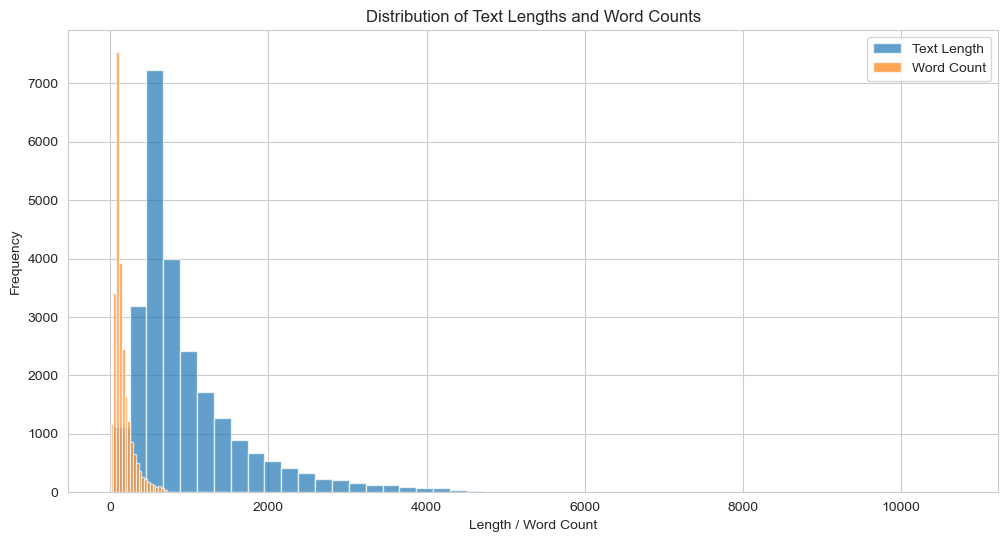

In [7]:
# Visualizing the distribution of review lengths and word counts to understand how verbose the reviews are.
# This helps in identifying outliers and understanding the data's structure.
df['text_length'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
plt.hist(df['text_length'], bins=50, alpha=0.7, label='Text Length')
plt.hist(df['word_count'], bins=50, alpha=0.7, label='Word Count')
plt.xlabel('Length / Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Text Lengths and Word Counts')
plt.show()

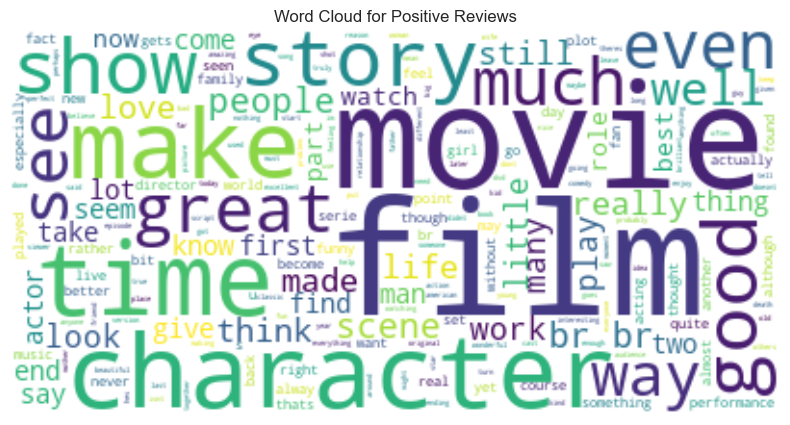

In [8]:
# Generating word clouds for positive and negative reviews to visually identify the most frequent words
# in each category. This is an intuitive way to grasp the common themes and sentiments in the reviews.
positive_reviews = df[df['label'] == 1]['clean_text']
wordcloud_pos = WordCloud(background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

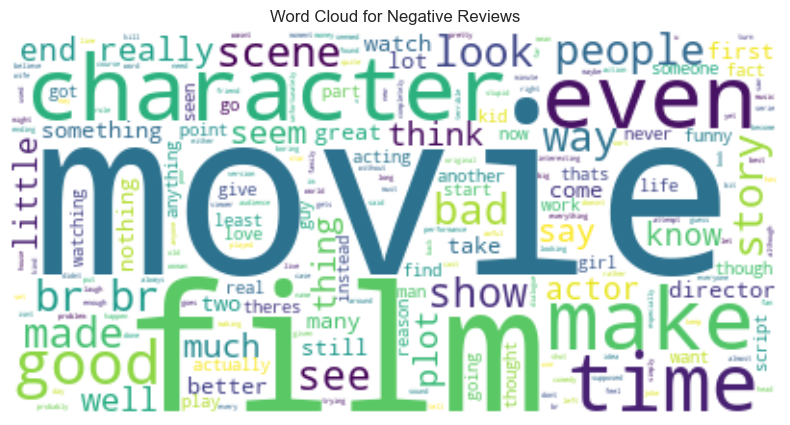

In [9]:
negative_reviews = df[df['label'] == 0]['clean_text']
wordcloud_neg = WordCloud(background_color='white').generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [10]:
# Analyzing the most common words in positive and negative reviews to identify key differences
# in language use between the two sentiments. This can provide insights into words strongly
# associated with positive or negative sentiment.
def get_most_common_words(texts):
    words = ' '.join(texts).split()
    word_freq = Counter(words)
    return word_freq.most_common(20)

In [13]:
print("Most common words in positive reviews:", get_most_common_words(positive_reviews))
print("Most common words in negative reviews:", get_most_common_words(negative_reviews))

Most common words in positive reviews: [('a', 83149), ('i', 35588), ('br', 27843), ('film', 19596), ('movie', 18142), ('his', 17154), ('he', 14617), ('its', 13036), ('who', 10883), ('her', 10317), ('so', 8889), ('like', 8729), ('very', 8270), ('about', 8249), ('out', 7744), ('when', 7415), ('some', 7404), ('good', 7397), ('just', 7098), ('she', 6927)]
Most common words in negative reviews: [('a', 78813), ('i', 40150), ('br', 29843), ('movie', 23670), ('film', 17864), ('his', 12098), ('its', 12069), ('he', 12032), ('so', 11011), ('like', 10913), ('just', 10536), ('who', 9487), ('about', 8991), ('out', 8590), ('some', 8276), ('no', 7882), ('her', 7821), ('even', 7606), ('good', 7159), ('bad', 7089)]


# Insights Gained from EDA:

Sentiment Indicators: The common words in each sentiment category serve as potential indicators of sentiment. Words frequently appearing in positive reviews might be weighted differently in sentiment analysis models compared to those in negative reviews.

Emotional Intensity: The use of intensifiers in both positive and negative contexts shows emotional intensity. This aspect can be crucial for sentiment analysis, especially in distinguishing between mildly and strongly expressed sentiments.